## Linear Regression with Gradient Descent

We'll consider the data on the radial velocity of Galaxy NGC7531


    http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/galaxy.info.txt
    Radial Velocity of Galaxy NGC7531

    SUMMARY:
           The galaxy data frame records the  radial  velocity  of  a
           spiral  galaxy  measured  at 323 points in the area of sky
           which it covers.  All the measurements  lie  within  seven
           slots  crossing at the origin.  The positions of the meas-
           urements given by four variables (columns).

    DATA DESCRIPTION:
    east.west:     the east-west coordinate.  The origin,  (0,0),  is
           near  the  center of the galaxy, east is negative, west is
           positive.
    north.south:   the north-south coordinate.  The origin, (0,0), is
           near the center of the galaxy, south is negative, north is
           positive.
    angle:    degrees of counter-clockwise rotation from the horizon-
           tal of the slot within which the observation lies.
    radial.position:    signed  distance  from  origin;  negative  if
           east-west coordinate is negative.
    velocity:   radial velocity measured in km/sec.

    SOURCE:
           Buta, R. (1987)  The  Structure  and  Dynamics  of  Ringed
           Galaxies,  III:  Surface  Photometry and Kinematics of the
           Ringed Nonbarred Spiral NGC7531.    The  Astrophysical  J.
           Supplement Ser. Vol. 64, pp. 1--37.

             John M. Chambers and Trevor J. Hastie, (eds.)  Statistical
           Models in S, Wadsworth and Brooks, Pacific Grove, CA 1992,
           pg. 352.



In [24]:
%matplotlib inline 

In [5]:
import pandas as pd
from numpy import *
from numpy.linalg import norm

dat = pd.read_csv("galaxy.data")


x1 = dat.loc[:,"east.west"].as_matrix()
x2 = dat.loc[:, "north.south"].as_matrix()
y = dat.loc[:, "velocity"].as_matrix()


In [8]:
x2.shape

(323,)

Now, let's write the cost function and the gradient of the cost function.

In [10]:
y.shape

(323,)

In [19]:
ones((4, 3),)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [20]:
def f(x, y, theta):
    # theta = np.array([t1, t2, t3])
    
    x = vstack( (ones((1, x.shape[1])), x))
    return sum( (y - dot(theta.T,x)) ** 2)

def df(x, y, theta):
    x = vstack( (ones((1, x.shape[1])), x))
    return -2*sum((y-dot(theta.T, x))*x, 1)
    

The gradient descent algorithm is the same:

In [32]:
def grad_descent(f, df, x, y, init_t, alpha):
    EPS = 1e-5   #EPS = 10**(-5)
    prev_t = init_t-10*EPS
    t = init_t.copy()
    max_iter = 30000
    iter  = 0
    while norm(t - prev_t) >  EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*df(x, y, t)
        if iter % 500 == 0:
            print "Iter", iter
            print "theta = (%.2f, %.2f, %.2f), f(theta) = %.2f" % (t[0], t[1], t[2], f(x, y, t)) 
            print "Gradient: ", df(x, y, t), "\n"
        iter += 1
    return t


Let's check the gradient to make sure it works:

In [22]:
x = vstack((x1, x2))
theta = array([-3, 2, 1])

h = 0.000001
print (f(x, y, theta+array([h, 0, 0])) - f(x, y, theta-array([h, 0, 0])))/(2*h)
print df(x, y, theta)


-1030866.86134
[-1030866.79673168   217161.22653259   -29883.8912257 ]


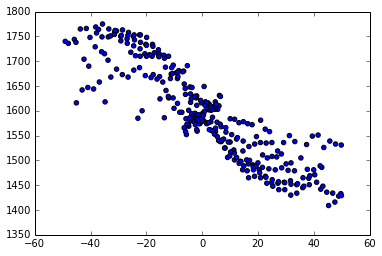

In [30]:
from matplotlib.pyplot import *

scatter(x2, y)

In [33]:
x = vstack((x1, x2))
theta0 = array([0., 0., 0.])
theta = grad_descent(f, df, x, y, theta0, 0.0000010)

Iter 0
theta = (1.03, -0.05, 0.32), f(theta) = 822017775.24
Gradient:  [-1028488.48191787    39503.94379375  -211469.28135073] 

Iter 500
theta = (440.65, 0.38, -0.29), f(theta) = 432219704.26
Gradient:  [-745195.41327602   -1246.48132255    2086.28965059] 

Iter 1000
theta = (759.38, 0.92, -1.19), f(theta) = 227355448.41
Gradient:  [-540285.76135469    -903.73088504    1512.61343293] 

Iter 1500
theta = (990.47, 1.30, -1.83), f(theta) = 119666065.36
Gradient:  [-391721.01534996    -655.22803896    1096.68348152] 

Iter 2000
theta = (1158.01, 1.58, -2.30), f(theta) = 63057833.85
Gradient:  [-284007.76929983    -475.05711064     795.12361351] 

Iter 2500
theta = (1279.49, 1.79, -2.64), f(theta) = 33301029.76
Gradient:  [-205912.90704841    -344.42857288     576.48498534] 

Iter 3000
theta = (1367.56, 1.93, -2.89), f(theta) = 17659004.46
Gradient:  [-149292.13166828    -249.7195372      417.96637991] 

Iter 3500
theta = (1431.41, 2.04, -3.07), f(theta) = 9436583.97
Gradient:  [-108240.61

There is an exact solution:

In [7]:
x = vstack((x1, x2))
x = vstack( (ones((1, x.shape[1])), x))
dot(dot(linalg.inv(dot(x, x.T)),x), y)

array([ 1599.7805884 ,     2.32128786,    -3.53935822])